### load data + inspect

In [9]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.train.labels.shape

(55000, 10)

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

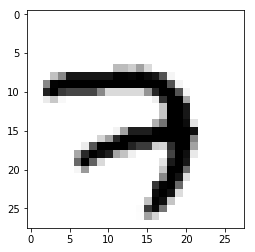

In [15]:
plt.imshow(mnist.train.images[0].reshape(28,28), cmap='Greys')

### params

In [18]:
LEARN_RATE = 0.1
EPOCHS = 10
BATCH_SIZE = 100

pixel_shape = mnist.train.images.shape[1]
output_shape = mnist.train.labels.shape[1]

### tensor calcs

In [20]:
x = tf.placeholder(tf.float32, [None, pixel_shape])
y = tf.placeholder(tf.float32, [None, output_shape])

# hidden layer weights & biases
w_xh = tf.Variable(tf.random_normal([pixel_shape, 300], stddev=.03), name='w_xh')
b_h = tf.Variable(tf.random_normal([300]), name='b_h')

# output layer weights & biases
w_yh = tf.Variable(tf.random_normal([300, output_shape], stddev=.03), name='w_yh')
b_y = tf.Variable(tf.random_normal([output_shape]), name='b_y')

# forward prop
z1 = tf.add(tf.matmul(x, w_xh), b_h)
a1 = tf.nn.relu(z1)
z2 = tf.add(tf.matmul(a1, w_yh), b_y)
yhat = tf.nn.softmax(z2)

# cost function
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(yhat), reduction_indices=[1]))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARN_RATE)\
        .minimize(cross_entropy_loss)

# eval
correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(yhat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [21]:
# run session

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    total_batch = int(len(mnist.train.labels) / BATCH_SIZE)
    
    for epoch in range(EPOCHS):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=BATCH_SIZE)
            _, c = sess.run([optimizer, cross_entropy_loss],
                            feed_dict={x: batch_x, y: batch_y})
            avg_cost += (c / total_batch)
            
        print('EPOCH = ', epoch+1, '\t|\tCOST = ', avg_cost)
        
    print('TEST ACCURACY = ', sess.run(accuracy,
                                      feed_dict={x: mnist.test.images, y: mnist.test.labels}))

EPOCH =  1 	|	COST =  0.5371539531512696
EPOCH =  2 	|	COST =  0.28608961950648887
EPOCH =  3 	|	COST =  0.23113566637039182
EPOCH =  4 	|	COST =  0.19076744271950272
EPOCH =  5 	|	COST =  0.16191338936036284
EPOCH =  6 	|	COST =  0.14037737362764105
EPOCH =  7 	|	COST =  0.12397151117975054
EPOCH =  8 	|	COST =  0.11063828297975398
EPOCH =  9 	|	COST =  0.09980362334711983
EPOCH =  10 	|	COST =  0.0909587686237964
TEST ACCURACY =  0.9694
